<h2> Open University Learning Analytics </h2>
<h3> Task: Visualising factors associated with the completion of an OU module 
<h3>  Platform: Jupyter Python Notebook </h3>

<h3>1. Loading data and data inspection</h3>

In [108]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

df_studentReg = pd.read_csv("studentRegistration.csv")
df_studentReg.head()
len(df_studentReg)

32593

In [109]:
df_studentInfo = pd.read_csv("studentInfo.csv")
len(df_studentInfo)

32593

In [110]:
df_studentAssessment = pd.read_csv("studentAssessment.csv")
len(df_studentAssessment)

173912

In [111]:
print(df_studentAssessment.columns)
len(df_studentAssessment.groupby(['id_student']))

Index([u'id_assessment', u'id_student', u'date_submitted', u'is_banked',
       u'score'],
      dtype='object')


23369

In [112]:
df_studentVle = pd.read_csv("studentVle.csv")
df_studentVle.columns
len(df_studentVle)

10655280

In [113]:
df_assessment = pd.read_csv("assessments.csv")
df_vle = pd.read_csv("vle.csv")
df_course = pd.read_csv("courses.csv")
df_course.head()
len(df_course)

22

In [114]:
df_course.groupby(['code_module','code_presentation'])['code_presentation'].count()


code_module  code_presentation
AAA          2013J                1
             2014J                1
BBB          2013B                1
             2013J                1
             2014B                1
             2014J                1
CCC          2014B                1
             2014J                1
DDD          2013B                1
             2013J                1
             2014B                1
             2014J                1
EEE          2013J                1
             2014B                1
             2014J                1
FFF          2013B                1
             2013J                1
             2014B                1
             2014J                1
GGG          2013J                1
             2014B                1
             2014J                1
Name: code_presentation, dtype: int64

<h3>2. Checking data integrity</h3>

In [115]:
df_studentInfo.groupby(['code_module','code_presentation'])['id_student'].count()

code_module  code_presentation
AAA          2013J                 383
             2014J                 365
BBB          2013B                1767
             2013J                2237
             2014B                1613
             2014J                2292
CCC          2014B                1936
             2014J                2498
DDD          2013B                1303
             2013J                1938
             2014B                1228
             2014J                1803
EEE          2013J                1052
             2014B                 694
             2014J                1188
FFF          2013B                1614
             2013J                2283
             2014B                1500
             2014J                2365
GGG          2013J                 952
             2014B                 833
             2014J                 749
Name: id_student, dtype: int64

In [116]:
df_studentReg.groupby(['code_module','code_presentation'])['id_student'].count()

code_module  code_presentation
AAA          2013J                 383
             2014J                 365
BBB          2013B                1767
             2013J                2237
             2014B                1613
             2014J                2292
CCC          2014B                1936
             2014J                2498
DDD          2013B                1303
             2013J                1938
             2014B                1228
             2014J                1803
EEE          2013J                1052
             2014B                 694
             2014J                1188
FFF          2013B                1614
             2013J                2283
             2014B                1500
             2014J                2365
GGG          2013J                 952
             2014B                 833
             2014J                 749
Name: id_student, dtype: int64

In [117]:
df_studentVle.groupby(['code_module','code_presentation','id_student'])['id_student'].count()[0:25]

code_module  code_presentation  id_student
AAA          2013J              11391         196
                                28400         430
                                30268          76
                                31604         663
                                32885         352
                                38053         723
                                45462         355
                                45642         531
                                52130         593
                                53025         904
                                57506         403
                                58873         526
                                59185         345
                                62155         981
                                63400         760
                                65002          54
                                70464         205
                                71361         728
                                74372          72
       

<h3> 3. Join Data Tables </h3>

<h4>3.1 Join Table "StudentInfo" and "StudentRegistration" by "code_module", "code_presentation", "id_student" </h4>
<p> Observation: each module have 2-4 code presentations, module CCC 2014J has the highest # of students registered</p>

In [118]:
df_mergedInfoReg = pd.merge(df_studentInfo, df_studentReg, how="left", left_on=['code_module', 'code_presentation','id_student'],
                            right_on=['code_module', 'code_presentation','id_student'])
df_mergedInfoReg.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,NaN
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,-53.0,NaN
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,-92.0,12.0
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,-52.0,NaN
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,-176.0,NaN


In [119]:
mergedCount=df_mergedInfoReg.groupby(['code_module','code_presentation'])
mergedCount['id_student'].count()

code_module  code_presentation
AAA          2013J                 383
             2014J                 365
BBB          2013B                1767
             2013J                2237
             2014B                1613
             2014J                2292
CCC          2014B                1936
             2014J                2498
DDD          2013B                1303
             2013J                1938
             2014B                1228
             2014J                1803
EEE          2013J                1052
             2014B                 694
             2014J                1188
FFF          2013B                1614
             2013J                2283
             2014B                1500
             2014J                2365
GGG          2013J                 952
             2014B                 833
             2014J                 749
Name: id_student, dtype: int64

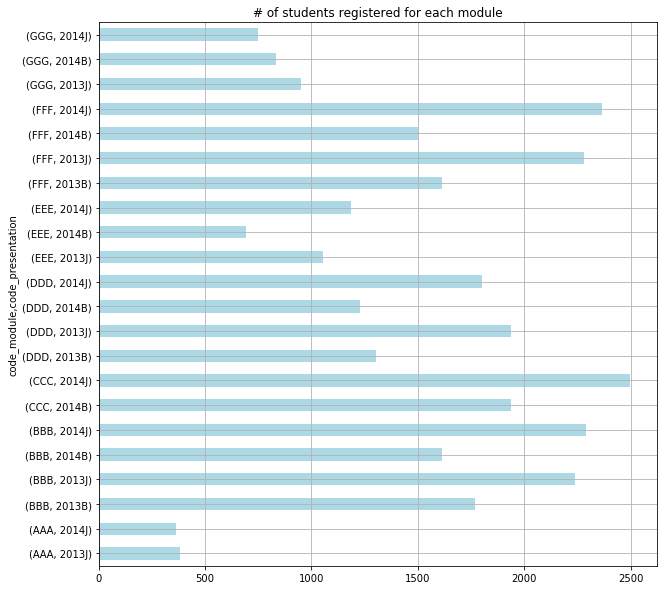

In [120]:
%matplotlib inline 
mergedCount['id_student'].size().plot.barh(title='# of students registered for each module',figsize=[10,10], grid=True,color="lightblue")

 <h4>3.2 Join Table "StudentAssessment" and "Assessment" </h4>
 <p> Observation: each module / presentation involves multiple assessments, most assessments DO NOT have 100% turn in rate. Module DDD has the most # of assessments 14, Module EEE has the least # of assessments 4 </p>

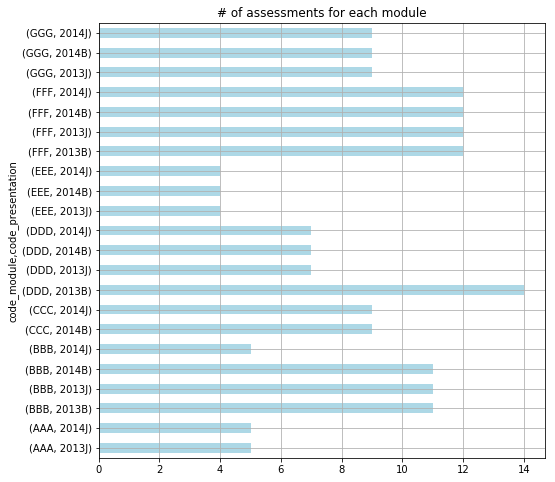

In [121]:
%matplotlib inline
df_mergedStuAss = pd.merge(df_studentAssessment, df_assessment, how="left", left_on=['id_assessment'],
                            right_on=['id_assessment'])
df_mergedStuAss.groupby(['code_module','code_presentation'] ).id_assessment.nunique().plot.barh(
    title='# of assessments for each module', figsize=[8,8], grid=True,color="lightblue")

In [122]:
ass_count = df_mergedStuAss.groupby(['code_module','code_presentation','id_assessment']).id_assessment.count()
stu_count = df_mergedInfoReg.groupby(['code_module','code_presentation']).id_student.count()

ass_count[0:5]/stu_count[0]


code_module  code_presentation  id_assessment
AAA          2013J              1752             0.937337
                                1753             0.892950
                                1754             0.864230
                                1755             0.791123
                                1756             0.778068
Name: id_assessment, dtype: float64

<h4> 3.3* Merge Table "studentVle" into the merged data frame on studentInfoReg </h4>
<p> Observation: For each module, most student has multiple interactions with the VLE. Module FFF has the most # of average clicks. Module DDD has the least # of average clicks </p>

In [123]:
df_mergedInfoRegVle = pd.merge(df_mergedInfoReg, df_studentVle, 
                               how="left", left_on=['code_module','code_presentation', "id_student"],
                               right_on=['code_module', 'code_presentation',"id_student"])
df_mergedInfoRegVle.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration,id_site,date,sum_click
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,NaN,546669.0,-5.0,16.0
1,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,NaN,546662.0,-5.0,44.0
2,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,NaN,546652.0,-5.0,1.0
3,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,NaN,546668.0,-5.0,2.0
4,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,NaN,546652.0,-5.0,1.0


code_module  code_presentation  id_student
AAA          2013J              11391         196
                                28400         430
                                30268          76
                                31604         663
                                32885         352
                                38053         723
                                45462         355
                                45642         531
                                52130         593
                                53025         904
Name: id_student, dtype: int64


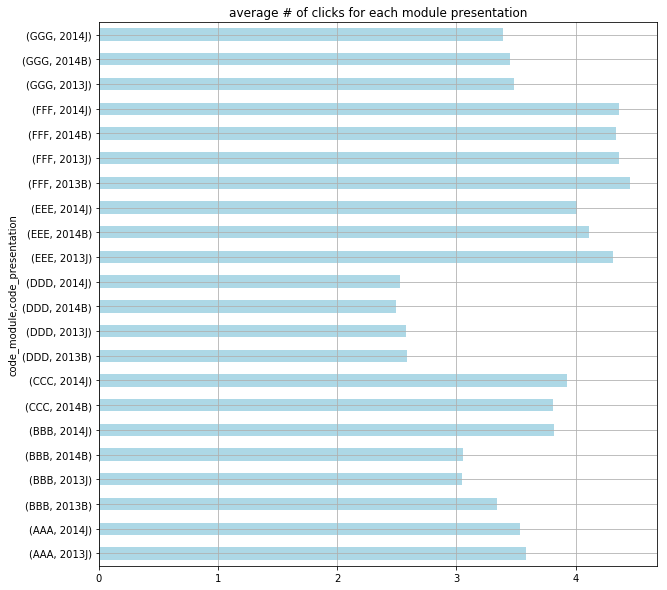

In [124]:
print(df_mergedInfoRegVle.groupby(['code_module','code_presentation','id_student']).id_student.count()[0:10])
df_mergedInfoRegVle.groupby(['code_module','code_presentation']
                           )['sum_click'].mean().plot.barh(
    title='average # of clicks for each module presentation', figsize=[10,10], grid=True,color="lightblue")

<h3> 4. Adding the attribute "completion" to the merged data frame</h3>

<h5> Removing the records that have inconsistent information for "final_result" and "date_unregistration"</h5>

In [125]:
noise1 = df_mergedInfoReg[df_mergedInfoReg['date_unregistration'].notnull()&(df_mergedInfoReg['final_result']!='Withdrawn')]
noise2 = df_mergedInfoReg[(df_mergedInfoReg['date_unregistration'].isnull())&(df_mergedInfoReg['final_result']=='Withdrawn')]
noise2

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration
6315,BBB,2014B,2512349,F,Yorkshire Region,Lower Than A Level,40-50%,35-55,0,60,N,Withdrawn,-17.0,NaN
6484,BBB,2014J,271047,F,South West Region,Lower Than A Level,90-100%,0-35,0,60,N,Withdrawn,-25.0,NaN
6601,BBB,2014J,417978,F,Wales,HE Qualification,80-90%,35-55,0,60,N,Withdrawn,-24.0,NaN
7247,BBB,2014J,636660,F,North Western Region,Lower Than A Level,0-10%,0-35,0,60,N,Withdrawn,-113.0,NaN
7410,BBB,2014J,647876,F,East Anglian Region,Lower Than A Level,80-90%,0-35,0,120,N,Withdrawn,-162.0,NaN
7596,BBB,2014J,652754,F,South Region,Lower Than A Level,70-80%,0-35,0,60,N,Withdrawn,-143.0,NaN
7777,BBB,2014J,675671,F,West Midlands Region,A Level or Equivalent,0-10%,35-55,0,60,N,Withdrawn,-15.0,NaN
7953,BBB,2014J,682375,F,South Region,Lower Than A Level,90-100%,0-35,0,120,N,Withdrawn,-63.0,NaN
7957,BBB,2014J,682538,M,West Midlands Region,Lower Than A Level,10-20,0-35,0,120,N,Withdrawn,-24.0,NaN
7977,BBB,2014J,683536,F,North Western Region,Lower Than A Level,0-10%,0-35,0,120,N,Withdrawn,-74.0,NaN


In [126]:
df_mergedInfoReg = df_mergedInfoReg.drop(noise1.index)
df_mergedInfoReg = df_mergedInfoReg.drop(noise2.index)

In [127]:
df_mergedInfoReg['completion'] = np.isnan(df_mergedInfoReg['date_unregistration'])
df_mergedInfoReg.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration,completion
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,NaN,True
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,-53.0,NaN,True
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,-92.0,12.0,False
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,-52.0,NaN,True
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,-176.0,NaN,True


<h3>5. Select one particular code_module and code_presentation</h3>


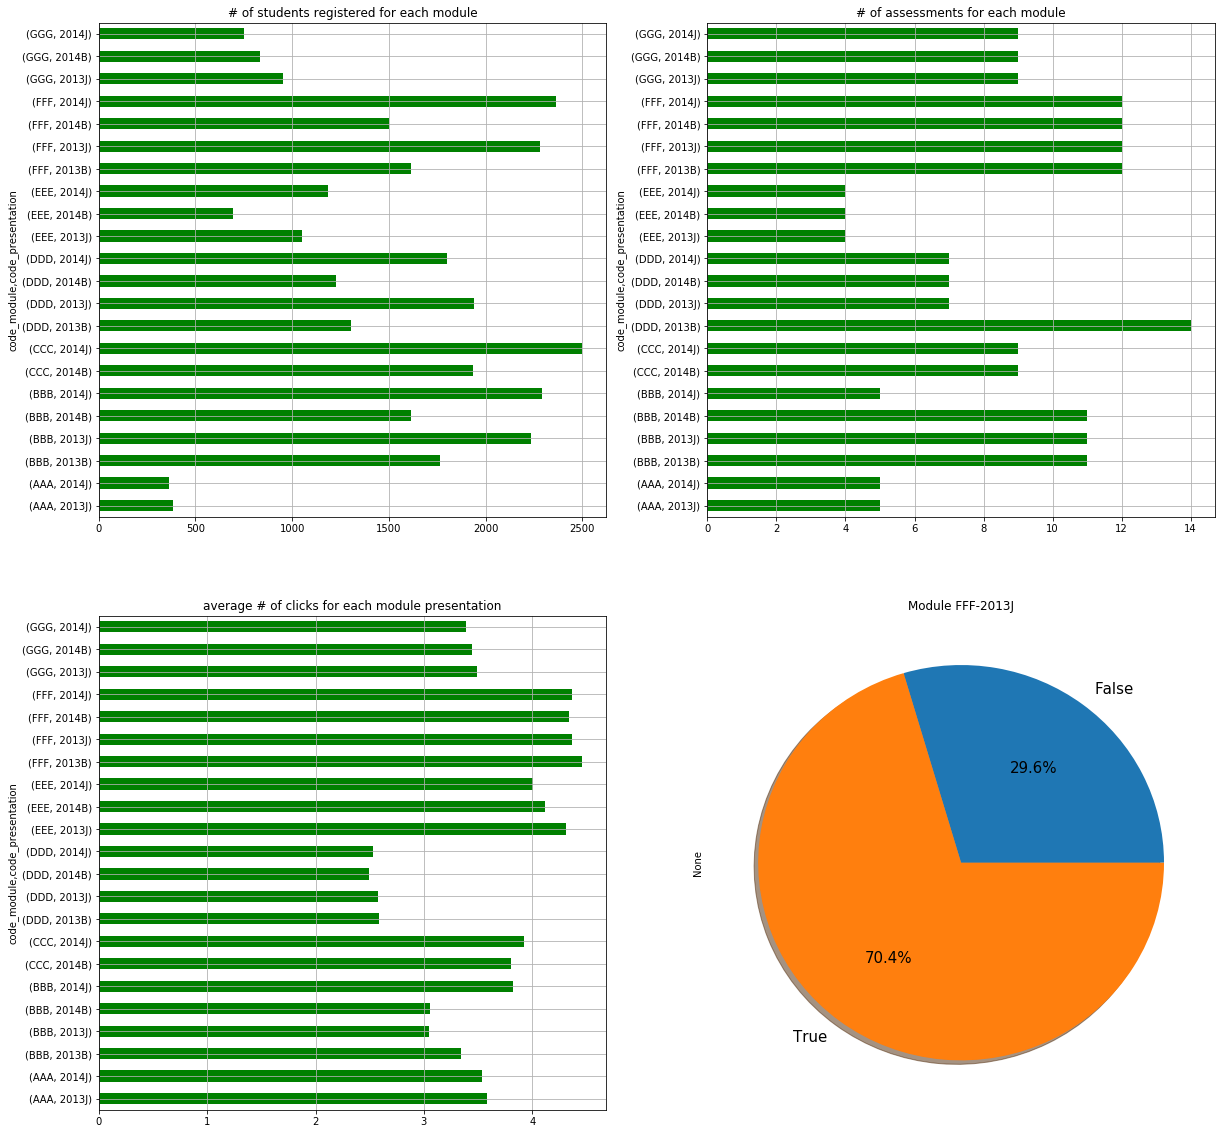

In [128]:
%matplotlib inline
fig, axs = plt.subplots(2,2, figsize=[20,20])
mergedCount['id_student'].size().plot.barh(title='# of students registered for each module', grid=True,color="green",ax=axs[0,0])
df_mergedStuAss.groupby(['code_module','code_presentation'] ).id_assessment.nunique().plot.barh(title='# of assessments for each module',  grid=True,color="green",ax=axs[0,1])
df_mergedInfoRegVle.groupby(['code_module','code_presentation'] )['sum_click'].mean().plot.barh(title='average # of clicks for each module presentation', grid=True,color="green",ax=axs[1,0])

Module = 'FFF'
presentation = '2013J'

AGp=df_mergedInfoReg.groupby(['code_module']).get_group(Module)
AGp_all = AGp.groupby(['code_presentation'])
AGp_all.get_group(presentation).groupby('completion').size().plot.pie(title="Module "+Module+"-"+presentation,ax=axs[1,1],autopct='%1.1f%%',
        shadow=True,fontsize=15)

In [129]:
AGp_pr = AGp_all.get_group(presentation)
AGp_pr.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration,completion
23911,FFF,2013J,26247,M,South East Region,HE Qualification,80-90%,35-55,2,60,N,Fail,-47.0,NaN,True
23912,FFF,2013J,29335,M,West Midlands Region,Lower Than A Level,40-50%,0-35,0,60,N,Distinction,-31.0,NaN,True
23913,FFF,2013J,29769,M,East Midlands Region,A Level or Equivalent,40-50%,0-35,1,60,N,Fail,-32.0,NaN,True
23914,FFF,2013J,32221,M,South Region,A Level or Equivalent,60-70%,0-35,0,60,N,Fail,-32.0,NaN,True
23915,FFF,2013J,33600,F,London Region,A Level or Equivalent,40-50%,35-55,0,150,N,Withdrawn,-43.0,32.0,False


In [130]:
# #saving to file
# AGp_prReplace = AGp_pr.fillna(500)
# AGp_prReplace.to_csv('Module_presentation_removeNoise.csv')

<h3>6. Visualising variable association -- mosaic plot </h3>

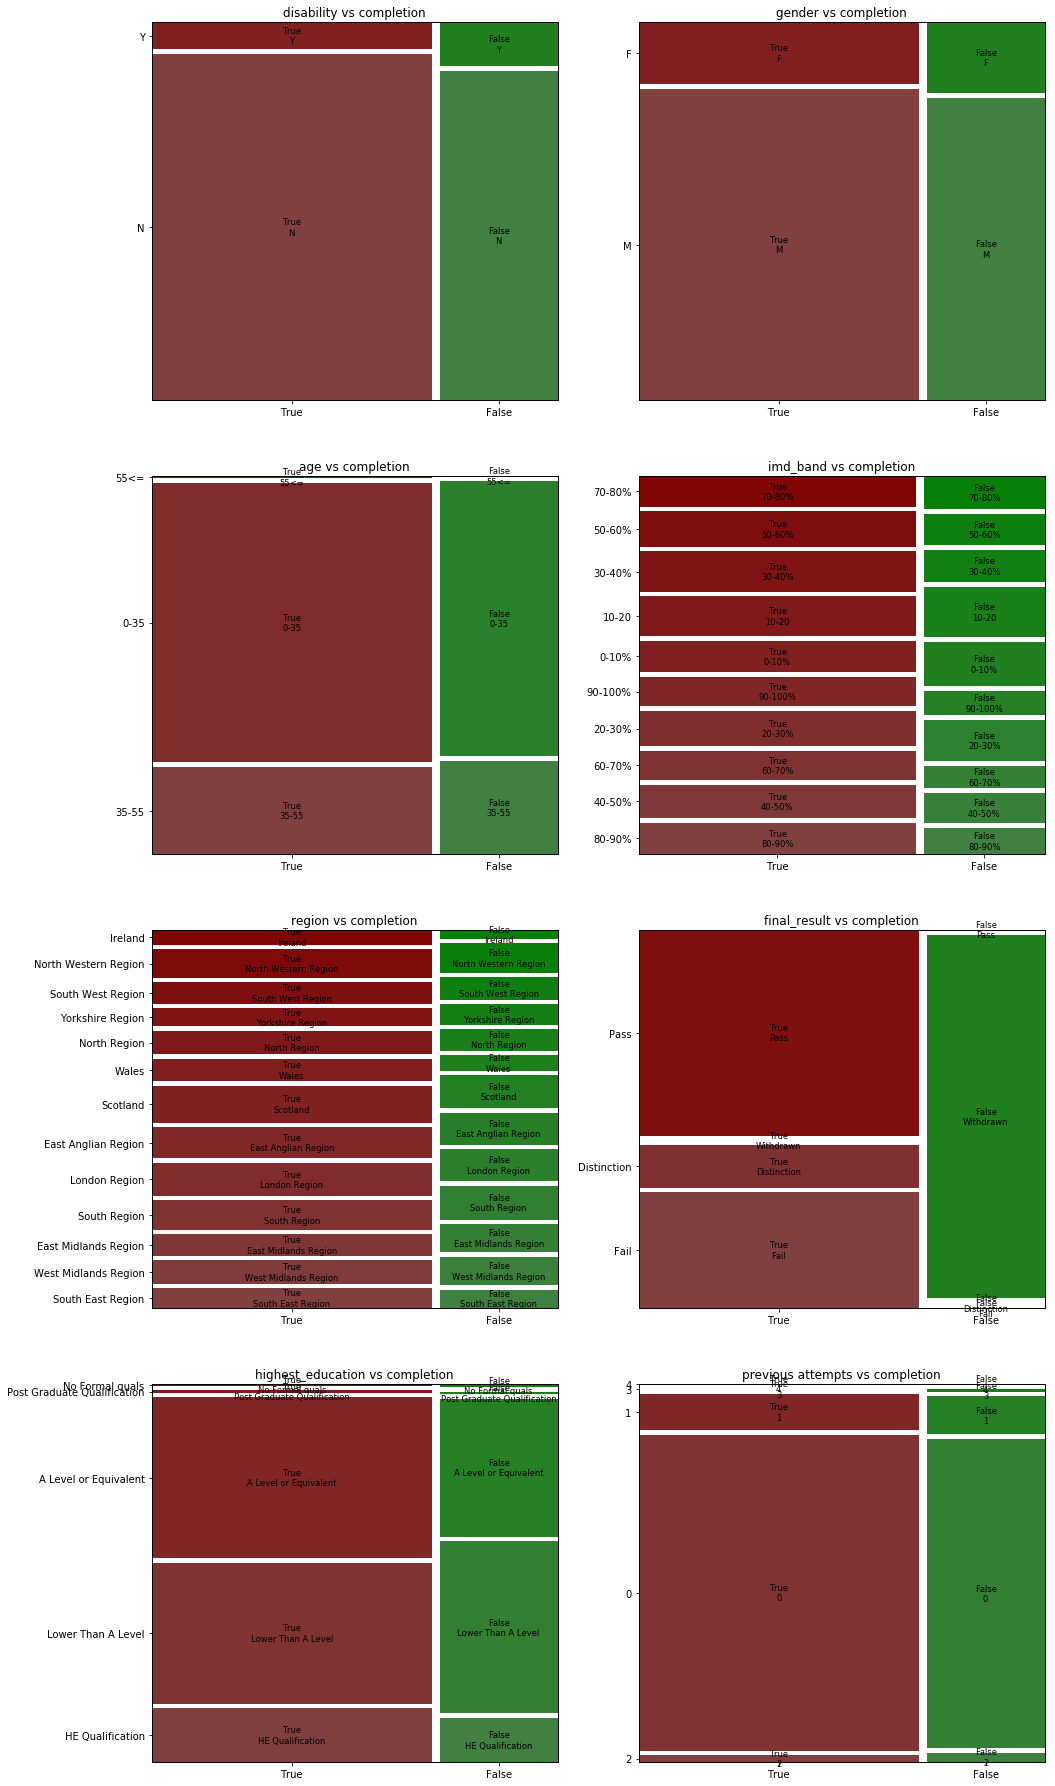

In [131]:
%matplotlib inline
from statsmodels.graphics.mosaicplot import mosaic
fig, axs = plt.subplots(4,2, figsize=[16,32])
[f,d]=mosaic(AGp_pr, ['completion','disability'],statistic=False, gap=0.02, title="disability vs completion",ax=axs[0,0])
[f,d]=mosaic(AGp_pr, ['completion','gender'],statistic=False, gap=0.02, title="gender vs completion" ,ax=axs[0,1])
[f,d]=mosaic(AGp_pr, ['completion','age_band'],statistic=False, gap=0.02, title="age vs completion",ax=axs[1,0])
[f,d]=mosaic(AGp_pr, ['completion','imd_band'],statistic=False, gap=0.02, title="imd_band vs completion",ax=axs[1,1])
[f,d]=mosaic(AGp_pr, ['completion','final_result'],statistic=False, gap=0.02, title="final_result vs completion",ax=axs[2,1])
[f,d]=mosaic(AGp_pr, ['completion','region'],statistic=False, gap=0.02, title="region vs completion",ax=axs[2,0])
[f,d]=mosaic(AGp_pr, ['completion','highest_education'],statistic=False, gap=0.02, title="highest_education vs completion",ax=axs[3,0])
[f,d]=mosaic(AGp_pr, ['completion','num_of_prev_attempts'],statistic=False, gap=0.02, title="previous attempts vs completion",ax=axs[3,1])

<h3>7. Calculating categorical variable pair-wise correlation </h3>

{'imd_band': 0.036970233143121034, 'final_result': -0.77255156878819986, 'highest_education': -0.075441042221248616, 'age_band': -0.005922604977094066, 'gender': 0.027417926020565194, 'region': -0.0057815095828073464, 'disability': -0.074506369114069687, 'previous_attempts': -0.039861947046411855}


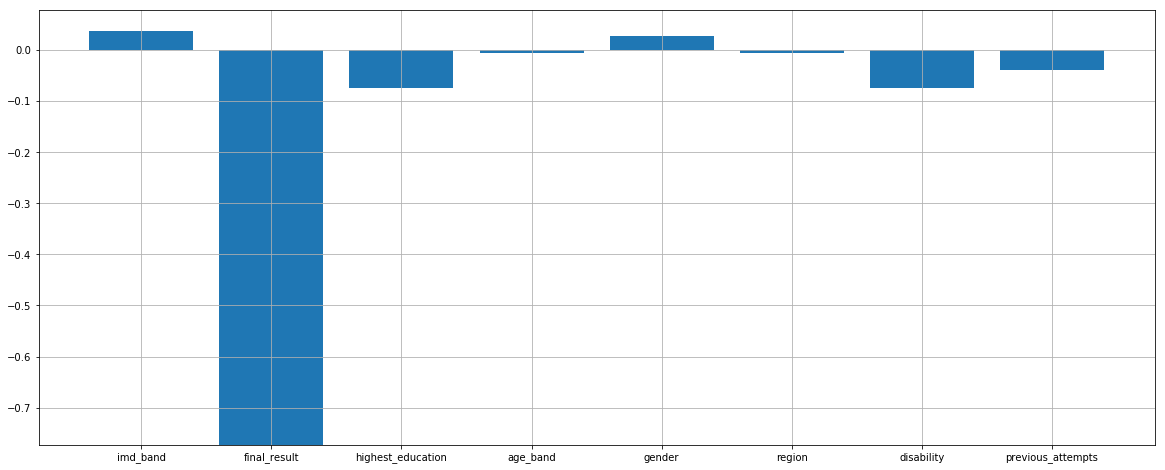

In [132]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
SelectedDF = AGp_pr[['completion','num_of_prev_attempts','gender','highest_education','age_band','disability','final_result','imd_band','region']]
SelectedDF_code = pd.DataFrame(data=SelectedDF)
SelectedDF_code["gender"] = lb_make.fit_transform(SelectedDF["gender"])
SelectedDF_code["highest_education"] = lb_make.fit_transform(SelectedDF["highest_education"])
SelectedDF_code["age_band"] = lb_make.fit_transform(SelectedDF["age_band"])
SelectedDF_code["disability"] = lb_make.fit_transform(SelectedDF["disability"])
SelectedDF_code["final_result"] = lb_make.fit_transform(SelectedDF["final_result"])
SelectedDF_code["imd_band"] = lb_make.fit_transform(SelectedDF["imd_band"])
SelectedDF_code["region"] = lb_make.fit_transform(SelectedDF["region"])
SelectedDF_code["completion"] = lb_make.fit_transform(SelectedDF["completion"])
SelectedDF_code["index"] = SelectedDF_code.index
correlation = dict()
correlation["disability"] = SelectedDF_code["disability"].corr(SelectedDF_code["completion"],method="pearson")
correlation['gender'] = SelectedDF_code["gender"].corr(SelectedDF_code["completion"],method="pearson")
correlation['age_band'] = SelectedDF_code["age_band"].corr(SelectedDF_code["completion"],method="pearson")
correlation['imd_band']= SelectedDF_code["imd_band"].corr(SelectedDF_code["completion"],method="pearson")
correlation['final_result']= SelectedDF_code["final_result"].corr(SelectedDF_code["completion"],method="pearson")
correlation['region']= SelectedDF_code["region"].corr(SelectedDF_code["completion"],method="pearson")
correlation['highest_education']= SelectedDF_code["highest_education"].corr(SelectedDF_code["completion"],method="pearson")
correlation['previous_attempts']= SelectedDF_code["num_of_prev_attempts"].corr(SelectedDF_code["completion"],method="pearson")
print(correlation)
fig = plt.figure(figsize=[20,8])
plt.bar(range(len(correlation)), correlation.values(), align='center')
a=plt.xticks(range(len(correlation)), correlation.keys())
plt.grid()

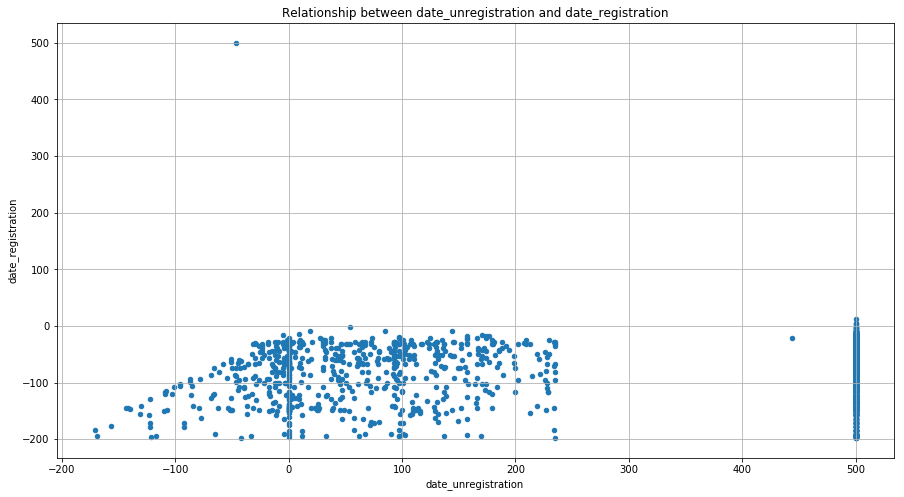

In [133]:
%matplotlib inline
AGp_prReplace = AGp_pr.fillna(500)
AGp_prReplace.plot(kind="scatter",x="date_unregistration", y="date_registration",figsize=[15,8],grid=True,title="Relationship between date_unregistration and date_registration")